<div style="float: left; vertical-align: middle; width: 100px; height: 100px;">
  <img src="Logos/NOAA_logo.png">
</div>
<div style="float: right; vertical-align: middle; width: 100px; height: 100px">
  <img src="Logos/NWS_logo.png">
</div>
<div style="text-align: center; vertical-align: top;">
  <span style="font-size: x-large">
  Time Series Data Analysis with Python<span>
  <br><br>
    <span style="font-size: x-large">Deanna Spindler</span><br><br>
  <span style="font-size: large">IMSG at NCEP/EMC<br>
  Verification, Post-Processing and Product Generation Branch</span>
</div>

<h1>What is pandas? </h1> 
<p style='font-size:x-large'>
The name comes from <b>pan</b>el <b>da</b>ta, a statistics term for multidimensional datasets.<br><br>
A high-perfomance open source library for tabular data manipulation and analysis
    developed by Wes McKinney in 2008.</p>

<h1>What does it do? </h1> 
<ul style='font-size:x-large'>
<li>Process a variety of data sets in different formats: time series, <br>
    heterogeneous tables, and matrix data.
<li>Provides a suite of data structures: 
    <ul style='font-size: large'>
    <li>Series (1D => think columns), 
    <li>DataFrame (2D => think tables or spreadsheets)
    <li>Panel (3D => a matrix of tables, I prefer to just use xarray)
    </ul>
<li>Missing data can be ignored, converted to 0, etc
<li>Facilitates many operations: subsetting, slicing, filtering, merging, <br>
    grouping, re-ordering and re-shaping
<li>Integrates well with other Python libraries, such as statsmodels and SciPy
<li>Easily load/import data from CSV and DB/SQL
</ul>

<h1>Example</h1>
    
<h2>Using pandas DataFrames to validate WAVEWATCH III model output with NDBC buoy data.</h2>


<ul style='font-size:x-large'>
<li>Creating DataFrames from ASCII files and remote data servers (OPeNDAP)<br><br>
<li>DataFrame manipulations (selecting, merging, grouping)<br><br>
<li>Basic descriptive statistics (RMS, Bias, Cross-Correlation, Scatter Index)
</ul>

<img src="ww3_prod_val_41008.png">

<p style='font-size:large'>
Python libraries provide a complete took-kit for data science and analysis:</p>
<ul style='font-size:large'>
<li>NumPy: general purpose array functionality with emphasis on numeric computation
<li>SciPy: numerical computing
<li>Matplotlib: graphics
<li>pandas: 1D and 2D array-like types (series and data frames)
<li>Statstool: statistical analysis
<li>Scikit-Learn: Machine learning
</ul>

<h2>First things first</h2>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import tarfile
import xarray 
import netCDF4
from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta

<h2>Start by choosing a buoy and period of interest</h2>

In [3]:
buoyID='41008'
year=2018
month=6

<h2>Get the quality controlled NDBC data</h2>

In [4]:
url='https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/'+buoyID+'/'+ \
    buoyID+'h'+str(year)+'.nc'
ncdata=xarray.open_dataset(url,decode_times=True)

<h2>Select the specific month of the year</h2>

In [5]:
startat=datetime(year,month,1)
stopat=startat+relativedelta(months=1)-relativedelta(days=1)

<h2>Subset the data to this time period, and make it a DataFrame</h2>

In [6]:
data=ncdata.sel(time=slice(startat,stopat)).to_dataframe()

<h2>Take a look at what is there</h2>

In [7]:
data.keys()

Index(['wind_dir', 'wind_spd', 'gust', 'wave_height', 'dominant_wpd',
       'average_wpd', 'mean_wave_dir', 'air_pressure', 'air_temperature',
       'sea_surface_temperature', 'dewpt_temperature', 'visibility',
       'water_level'],
      dtype='object')

<h2>Another way is to look at the first few rows of the DataFrame</h2>

In [8]:
data.head()

wind_dir  wind_spd  gust  \
latitude longitude  time                                            
31.4     -80.867996 2018-06-01 00:50:00     172.0       8.2   9.4   
                    2018-06-01 01:50:00     178.0       7.5   8.5   
                    2018-06-01 02:50:00     186.0       7.0   8.2   
                    2018-06-01 03:50:00     200.0       6.9   8.8   
                    2018-06-01 04:50:00     205.0       6.3   7.3   

                                         wave_height    dominant_wpd  \
latitude longitude  time                                               
31.4     -80.867996 2018-06-01 00:50:00         0.80 00:00:07.690000   
                    2018-06-01 01:50:00         0.89 00:00:07.140000   
                    2018-06-01 02:50:00         0.80 00:00:07.690000   
                    2018-06-01 03:50:00         0.86 00:00:07.690000   
                    2018-06-01 04:50:00         0.79 00:00:03.700000   

                                            average_wpd  mean_wave_dir  \
latitude longitude  time                                                 
31.4     -80.867996 2018-06-01 00:50:00 00:00:03.950000          100.0   
                    2018-06-01 01:50:00 00:00:03.940000          109.0   
                    2018-06-01 02:50:00 00:00:03.900000          113.0   
                    2018-06-01 03:50:00 00:00:04.160000          103.0   
                    2018-06-01 04:50:00 00:00:04.080000          171.0   

                                         air_pressure  air_temperature  \
latitude longitude  time                                                 
31.4     -80.867996 2018-06-01 00:50:00   1014.500000        25.700001   
                    2018-06-01 01:50:00   1015.200012        25.700001   
                    2018-06-01 02:50:00   1015.200012        25.700001   
                    2018-06-01 03:50:00   1015.299988        25.799999   
                    2018-06-01 04:50:00   1014.799988        25.600000   

                                         sea_surface_temperature  \
latitude longitude  time                                           
31.4     -80.867996 2018-06-01 00:50:00                26.100000   
                    2018-06-01 01:50:00                25.799999   
                    2018-06-01 02:50:00                25.700001   
                    2018-06-01 03:50:00                25.600000   
                    2018-06-01 04:50:00                25.600000   

                                         dewpt_temperature  visibility  \
latitude longitude  time                                                 
31.4     -80.867996 2018-06-01 00:50:00                NaN         NaN   
                    2018-06-01 01:50:00                NaN         NaN   
                    2018-06-01 02:50:00                NaN         NaN   
                    2018-06-01 03:50:00                NaN         NaN   
                    2018-06-01 04:50:00                NaN         NaN   

                                         water_level  
latitude longitude  time                              
31.4     -80.867996 2018-06-01 00:50:00          NaN  
                    2018-06-01 01:50:00          NaN  
                    2018-06-01 02:50:00          NaN  
                    2018-06-01 03:50:00          NaN  
                    2018-06-01 04:50:00          NaN

<h2>I like to index on a datetime stamp, so let's reset the index</h2>

In [9]:
data=data.reset_index()
data.index=data['time'].dt.round('1H')
data.index.name='datetime'

In [10]:
data.head()

latitude  longitude                time  wind_dir  \
datetime                                                                 
2018-06-01 01:00:00      31.4 -80.867996 2018-06-01 00:50:00     172.0   
2018-06-01 02:00:00      31.4 -80.867996 2018-06-01 01:50:00     178.0   
2018-06-01 03:00:00      31.4 -80.867996 2018-06-01 02:50:00     186.0   
2018-06-01 04:00:00      31.4 -80.867996 2018-06-01 03:50:00     200.0   
2018-06-01 05:00:00      31.4 -80.867996 2018-06-01 04:50:00     205.0   

                     wind_spd  gust  wave_height    dominant_wpd  \
datetime                                                           
2018-06-01 01:00:00       8.2   9.4         0.80 00:00:07.690000   
2018-06-01 02:00:00       7.5   8.5         0.89 00:00:07.140000   
2018-06-01 03:00:00       7.0   8.2         0.80 00:00:07.690000   
2018-06-01 04:00:00       6.9   8.8         0.86 00:00:07.690000   
2018-06-01 05:00:00       6.3   7.3         0.79 00:00:03.700000   

                        average_wpd  mean_wave_dir  air_pressure  \
datetime                                                           
2018-06-01 01:00:00 00:00:03.950000          100.0   1014.500000   
2018-06-01 02:00:00 00:00:03.940000          109.0   1015.200012   
2018-06-01 03:00:00 00:00:03.900000          113.0   1015.200012   
2018-06-01 04:00:00 00:00:04.160000          103.0   1015.299988   
2018-06-01 05:00:00 00:00:04.080000          171.0   1014.799988   

                     air_temperature  sea_surface_temperature  \
datetime                                                        
2018-06-01 01:00:00        25.700001                26.100000   
2018-06-01 02:00:00        25.700001                25.799999   
2018-06-01 03:00:00        25.700001                25.700001   
2018-06-01 04:00:00        25.799999                25.600000   
2018-06-01 05:00:00        25.600000                25.600000   

                     dewpt_temperature  visibility  water_level  
datetime                                                         
2018-06-01 01:00:00                NaN         NaN          NaN  
2018-06-01 02:00:00                NaN         NaN          NaN  
2018-06-01 03:00:00                NaN         NaN          NaN  
2018-06-01 04:00:00                NaN         NaN          NaN  
2018-06-01 05:00:00                NaN         NaN          NaN

<h2>The parameter names are long, and there are columns that are not used. <br><br>

Let's fix that</h2>

In [11]:
params={'wind_dir':'udir',
        'wind_spd':'u10',
        'wave_height':'Hs',
        'dominant_wpd':'Tp',
        'longitude':'lon',
        'latitude':'lat'}
dropkeys=[key for key in data if key not in params]
data.drop(dropkeys,axis=1,inplace=True)
data.rename(columns=params,inplace=True)

In [12]:
data.head()

lat        lon   udir  u10    Hs              Tp
datetime                                                              
2018-06-01 01:00:00  31.4 -80.867996  172.0  8.2  0.80 00:00:07.690000
2018-06-01 02:00:00  31.4 -80.867996  178.0  7.5  0.89 00:00:07.140000
2018-06-01 03:00:00  31.4 -80.867996  186.0  7.0  0.80 00:00:07.690000
2018-06-01 04:00:00  31.4 -80.867996  200.0  6.9  0.86 00:00:07.690000
2018-06-01 05:00:00  31.4 -80.867996  205.0  6.3  0.79 00:00:03.700000

<h2>The Tp column does not look right...</h2>

Pandas represents Timedeltas in nanosecond resolution using 64 bit integers

In [13]:
data.Tp=data.Tp.astype('timedelta64[s]').astype(float)

In [14]:
data.head()

lat        lon   udir  u10    Hs   Tp
datetime                                                   
2018-06-01 01:00:00  31.4 -80.867996  172.0  8.2  0.80  7.0
2018-06-01 02:00:00  31.4 -80.867996  178.0  7.5  0.89  7.0
2018-06-01 03:00:00  31.4 -80.867996  186.0  7.0  0.80  7.0
2018-06-01 04:00:00  31.4 -80.867996  200.0  6.9  0.86  7.0
2018-06-01 05:00:00  31.4 -80.867996  205.0  6.3  0.79  3.0

<h2>Suppose we want to look at the data in a specific column, <br>
or a Series:</h2>

In [15]:
Hs=data['Hs']

In [16]:
quartiles=numpy.percentile(Hs,[25,50,75])
hs_min,hs_max=Hs.min(),Hs.max()

/export/emc-lw-tspindle/wd20ts/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [17]:
print('Min: %.3f' % hs_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % hs_max)

Min: 0.290
Q1: nan
Median: nan
Q3: nan
Max: 1.130


<h2>Get rid of the NaN's</h2>

In [18]:
Hs=data['Hs'].dropna()

In [19]:
quartiles=numpy.percentile(Hs,[25,50,75])
print('Min: %.3f' % Hs.min())
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % Hs.max())

Min: 0.290
Q1: 0.460
Median: 0.535
Q3: 0.630
Max: 1.130


<h2>It's nice to take a quick look at the data</h2>

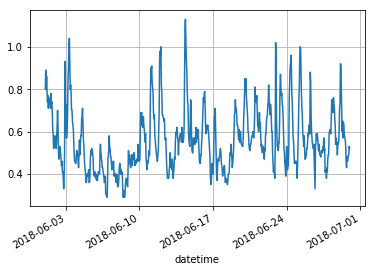

In [20]:
Hs.plot(grid=True);

<h2>In the above example, we used the OPeNDAP server to get the quality controlled NDBC data.<br><br>

If we wanted near-realtime data, we could get it the same way...</h2>

In [21]:
url='https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/'+buoyID+'/'+ \
    buoyID+'h9999.nc'
ncdata=xarray.open_dataset(url,decode_times=True)

<h2>or another way</h2>

<h2>Unidata has been developing Siphon, a suite of easy-to-use utilities for accessing remote data sources.</h2>

In [22]:
from siphon.simplewebservice.ndbc import NDBC
df = NDBC.realtime_observations('41008')
df.head()

wind_direction  wind_speed  wind_gust  wave_height  dominant_wave_period  \
0            80.0         4.0        5.0          0.8                  12.0   
1            90.0         3.0        4.0          0.9                  11.0   
2            10.0         3.0        3.0          0.9                  11.0   
3           320.0         3.0        3.0          0.9                  11.0   
4           340.0         3.0        3.0          1.0                  11.0   

   average_wave_period  dominant_wave_direction  pressure  air_temperature  \
0                  9.1                    100.0    1017.9             27.5   
1                  8.6                     97.0    1017.9             27.6   
2                  8.1                    101.0    1017.4             27.8   
3                  8.2                     89.0    1017.0             27.8   
4                  7.8                     88.0    1016.5             27.8   

   water_temperature  dewpoint  visibility  3hr_pressure_tendency  \
0               29.0      22.0         NaN                    0.9   
1               28.9      21.9         NaN                    1.4   
2               28.8      24.3         NaN                    1.8   
3               28.8      22.9         NaN                    2.0   
4               28.8      22.7         NaN                    1.7   

   water_level_above_mean                time  
0                     NaN 2018-09-11 15:50:00  
1                     NaN 2018-09-11 14:50:00  
2                     NaN 2018-09-11 13:50:00  
3                     NaN 2018-09-11 12:50:00  
4                     NaN 2018-09-11 11:50:00

<h2>Next, we need some model data for the same time period.<br><br>
In this example, we are going to use the archived monthly buoy files: <br><br>
NCEP_1806.tar.gz </h2>

<p style='font-size:large'>MemberName:</p>
<ul style='font-size:large'>
<li>NCEP_1806_000
<li>NCEP_1806_024
<li>NCEP_1806_048
<li>NCEP_1806_072
<li>NCEP_1806_096
<li>NCEP_1806_120
<li>NCEP_1806_144
<li>NCEP_1806_168
</ul>



In [23]:
ncep_cols=['id','year','month','day','hour','u10','udir','Hs','Tp']


In [24]:
w3data=pandas.DataFrame()
tar=tarfile.open('NCEP_1806.tar.gz')

In [25]:
for fcst in range(0,169,24):
    memberName='NCEP_'+str(year)[2:]+"{:02n}".format(month)+ \
               '_'+"{:03n}".format(fcst)
    member=tar.getmember(memberName)
    f=tar.extractfile(member)
    frame=pandas.read_csv(f,names=ncep_cols,
                     sep=' ',
                     usecols=[1,3,4,5,6,7,8,9,10],
                     skipinitialspace=True,
                     index_col=False)
    frame['datetime']=pandas.to_datetime(frame[['year','month','day','hour']])
    frame=frame.drop(['year','month','day','hour'],axis=1)
    frame=frame.set_index('datetime')
    frame['fcst']=fcst
    w3data=w3data.append(frame,ignore_index=False)
tar.close()


In [26]:
w3data.head()

id  u10  udir   Hs    Tp  fcst
datetime                                              
2018-06-01 00:00:00  13130  8.4    21  1.4  13.6     0
2018-06-01 06:00:00  13130  8.2    26  1.4  12.9     0
2018-06-01 12:00:00  13130  8.3    26  1.4  12.5     0
2018-06-01 18:00:00  13130  8.5    25  1.4  12.0     0
2018-06-02 00:00:00  13130  9.7    25  1.5   5.9     0

<h2> So now we have the NDBC data for buoy 41008 for June 2018, and the WW3 buoy data for all buoys for June 2018.<br><br>
Our next step is to subset the w3data to just the data for buoy 41008.</h2>

In [27]:
buoyID='41008'
model=w3data[w3data.id==buoyID].copy()

In [28]:
model.head()

id  u10  udir   Hs   Tp  fcst
datetime                                             
2018-06-01 00:00:00  41008  6.9   178  0.9  7.4     0
2018-06-01 06:00:00  41008  5.7   227  0.9  7.4     0
2018-06-01 12:00:00  41008  4.8   277  0.7  7.3     0
2018-06-01 18:00:00  41008  3.1   182  0.6  7.3     0
2018-06-02 00:00:00  41008  7.5   190  0.7  7.2     0

In [29]:
model.fcst.unique()

array([  0,  24,  48,  72,  96, 120, 144, 168])

<h2>If interested in a single forecast:</h2>

In [30]:
m000=model[model.fcst==0]

In [31]:
m000.head()

id  u10  udir   Hs   Tp  fcst
datetime                                             
2018-06-01 00:00:00  41008  6.9   178  0.9  7.4     0
2018-06-01 06:00:00  41008  5.7   227  0.9  7.4     0
2018-06-01 12:00:00  41008  4.8   277  0.7  7.3     0
2018-06-01 18:00:00  41008  3.1   182  0.6  7.3     0
2018-06-02 00:00:00  41008  7.5   190  0.7  7.2     0

In [32]:
m000.fcst.unique()

array([0])

<h2>Recall the NDBC data</h2>

In [33]:
data.head()

lat        lon   udir  u10    Hs   Tp
datetime                                                   
2018-06-01 01:00:00  31.4 -80.867996  172.0  8.2  0.80  7.0
2018-06-01 02:00:00  31.4 -80.867996  178.0  7.5  0.89  7.0
2018-06-01 03:00:00  31.4 -80.867996  186.0  7.0  0.80  7.0
2018-06-01 04:00:00  31.4 -80.867996  200.0  6.9  0.86  7.0
2018-06-01 05:00:00  31.4 -80.867996  205.0  6.3  0.79  3.0

In [34]:
buoy=data.copy()

<h2>Now we can merge both the model and the NDBC data for the same buoy:</h2>

In [35]:
both=pandas.merge(model,buoy,left_index=True,right_index=True, \
              suffixes=('_m','_b'),how='inner')

In [36]:
both.head()

id  u10_m  udir_m  Hs_m  Tp_m  fcst   lat        lon  \
datetime                                                                       
2018-06-01 06:00:00  41008    5.7     227   0.9   7.4     0  31.4 -80.867996   
2018-06-01 06:00:00  41008    6.1     217   0.9   7.4    24  31.4 -80.867996   
2018-06-01 06:00:00  41008    5.3     228   0.9   7.4    48  31.4 -80.867996   
2018-06-01 06:00:00  41008    6.0     214   0.9   7.4    72  31.4 -80.867996   
2018-06-01 06:00:00  41008    6.6     208   0.8   7.5    96  31.4 -80.867996   

                     udir_b  u10_b  Hs_b  Tp_b  
datetime                                        
2018-06-01 06:00:00   216.0    5.6  0.74   4.0  
2018-06-01 06:00:00   216.0    5.6  0.74   4.0  
2018-06-01 06:00:00   216.0    5.6  0.74   4.0  
2018-06-01 06:00:00   216.0    5.6  0.74   4.0  
2018-06-01 06:00:00   216.0    5.6  0.74   4.0

In [37]:
both024=both[both.fcst==24]
both024.head()

id  u10_m  udir_m  Hs_m  Tp_m  fcst   lat        lon  \
datetime                                                                       
2018-06-01 06:00:00  41008    6.1     217   0.9   7.4    24  31.4 -80.867996   
2018-06-01 12:00:00  41008    5.0     275   0.8   7.3    24  31.4 -80.867996   
2018-06-01 18:00:00  41008    3.4     164   0.6   7.3    24  31.4 -80.867996   
2018-06-02 00:00:00  41008    7.7     179   0.7   7.2    24  31.4 -80.867996   
2018-06-02 06:00:00  41008    6.9     233   0.8   7.2    24  31.4 -80.867996   

                     udir_b  u10_b  Hs_b  Tp_b  
datetime                                        
2018-06-01 06:00:00   216.0    5.6  0.74   4.0  
2018-06-01 12:00:00   267.0    5.7  0.73   7.0  
2018-06-01 18:00:00   161.0    1.5  0.61   7.0  
2018-06-02 00:00:00   174.0    4.4  0.53   7.0  
2018-06-02 06:00:00   217.0    4.3  0.62   3.0

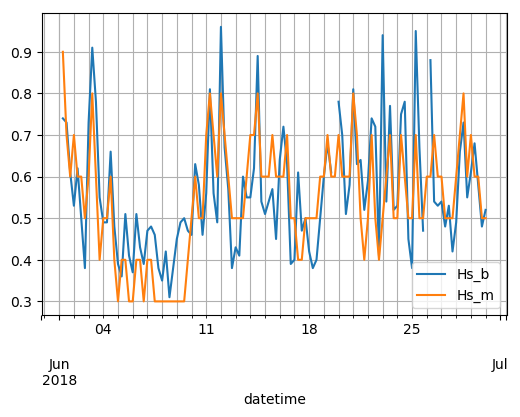

In [38]:
plt.figure(dpi=100)
ax=plt.axes()
both[both.fcst==0].plot(ax=ax,y=['Hs_b','Hs_m'])
ax.grid(which='both')

<h2>So we have both the model and the NDBC data for the buoy <br><br>

in the pandas DataFrame "both"</h2>

In [39]:
both.keys()

Index(['id', 'u10_m', 'udir_m', 'Hs_m', 'Tp_m', 'fcst', 'lat', 'lon', 'udir_b',
       'u10_b', 'Hs_b', 'Tp_b'],
      dtype='object')

<h2>Ready to calculate some basic stats...<br><br>
First, see what methods the object has built-in</h2>

In [40]:
dir(both)

['Hs_b',
 'Hs_m',
 'T',
 'Tp_b',
 'Tp_m',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 

In [41]:
methods=[x for x in dir(both) if not x.startswith('_')]
print(', '.join(methods))

Hs_b, Hs_m, T, Tp_b, Tp_m, abs, add, add_prefix, add_suffix, agg, aggregate, align, all, any, append, apply, applymap, as_matrix, asfreq, asof, assign, astype, at, at_time, axes, between_time, bfill, bool, boxplot, clip, clip_lower, clip_upper, columns, combine, combine_first, compound, copy, corr, corrwith, count, cov, cummax, cummin, cumprod, cumsum, describe, diff, div, divide, dot, drop, drop_duplicates, dropna, dtypes, duplicated, empty, eq, equals, eval, ewm, expanding, fcst, ffill, fillna, filter, first, first_valid_index, floordiv, from_dict, from_records, ftypes, ge, get, get_dtype_counts, get_ftype_counts, get_values, groupby, gt, head, hist, iat, id, idxmax, idxmin, iloc, index, infer_objects, info, insert, interpolate, isin, isna, isnull, items, iteritems, iterrows, itertuples, ix, join, keys, kurt, kurtosis, last, last_valid_index, lat, le, loc, lon, lookup, lt, mad, mask, max, mean, median, melt, memory_usage, merge, min, mod, mode, mul, multiply, ndim, ne, nlargest, notn

In [42]:
both[both.fcst==0].describe()

u10_m      udir_m        Hs_m        Tp_m   fcst    lat  \
count  116.000000  116.000000  116.000000  116.000000  116.0  116.0   
mean     4.934483  210.379310    0.546552    7.294828    0.0   31.4   
std      1.573924   59.233166    0.137955    1.670555    0.0    0.0   
min      1.100000   15.000000    0.300000    3.100000    0.0   31.4   
25%      3.700000  170.750000    0.500000    7.075000    0.0   31.4   
50%      5.100000  210.000000    0.600000    8.000000    0.0   31.4   
75%      6.125000  260.250000    0.600000    8.400000    0.0   31.4   
max      8.700000  336.000000    0.900000    8.900000    0.0   31.4   

              lon      udir_b       u10_b        Hs_b        Tp_b  
count  116.000000  116.000000  116.000000  114.000000  114.000000  
mean   -80.867996  209.034483    4.875862    0.562018    5.947368  
std      0.000000   56.027777    2.001505    0.144051    2.663560  
min    -80.867996   15.000000    0.100000    0.310000    2.000000  
25%    -80.867996  181.000000    3.500000    0.462500    4.000000  
50%    -80.867996  211.000000    4.950000    0.535000    5.500000  
75%    -80.867996  244.500000    6.200000    0.637500    8.000000  
max    -80.867996  356.000000   10.000000    0.960000   14.000000

<h2>Help is available for the objects bound methods</h2>

In [43]:
help(both.corr)

Help on method corr in module pandas.core.frame:

corr(method='pearson', min_periods=1) method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'}
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for pearson
        and spearman correlation
    
    Returns
    -------
    y : DataFrame



<h2>Suppose we want to look at the correlation coefficient <br>
for one forecast grouped by day</h2>

In [44]:
corr=both['Hs_m'][both.fcst==0].groupby(pandas.Grouper(freq='D')).corr(both['Hs_b'])

In [45]:
corr.head()

datetime
2018-06-01    0.799368
2018-06-02    0.617802
2018-06-03    0.985839
2018-06-04    0.846649
2018-06-05    0.310881
Freq: D, Name: Hs_m, dtype: float64

<h2>Another way, is to select a parameter and forecast to validate</h2> 

In [46]:
model=both[both.fcst==0]['Hs_m'].copy()
obs=both[both.fcst==0]['Hs_b'].copy()

<h2>To aggregate the data by day, we need to "group" the data <br>(think of looping through and collecting your data into chunks)</h2>

In [47]:
obsgrp=obs.groupby(pandas.Grouper(freq='D'))

<h2>Calculate some basic stats, grouped by day</h2>

In [48]:
diff=model-obs
diffgroup=diff.groupby(pandas.Grouper(freq='D'))
[v for v in diffgroup.groups.items()][:10]

[(Timestamp('2018-06-01 00:00:00', freq='D'), 3),
 (Timestamp('2018-06-02 00:00:00', freq='D'), 7),
 (Timestamp('2018-06-03 00:00:00', freq='D'), 11),
 (Timestamp('2018-06-04 00:00:00', freq='D'), 15),
 (Timestamp('2018-06-05 00:00:00', freq='D'), 19),
 (Timestamp('2018-06-06 00:00:00', freq='D'), 23),
 (Timestamp('2018-06-07 00:00:00', freq='D'), 27),
 (Timestamp('2018-06-08 00:00:00', freq='D'), 31),
 (Timestamp('2018-06-09 00:00:00', freq='D'), 35),
 (Timestamp('2018-06-10 00:00:00', freq='D'), 39)]

In [49]:
diff2group=(diff**2).groupby(pandas.Grouper(freq='D'))
count=diffgroup.count()

In [50]:
bias=diffgroup.mean()
bias.head()

datetime
2018-06-01    0.0400
2018-06-02    0.0925
2018-06-03   -0.1425
2018-06-04   -0.0300
2018-06-05   -0.0675
Freq: D, dtype: float64

In [51]:
rmse=diff2group.mean()**0.5
rmse.head()

datetime
2018-06-01    0.094163
2018-06-02    0.115866
2018-06-03    0.144827
2018-06-04    0.050498
2018-06-05    0.092060
Freq: D, dtype: float64

In [52]:
scatter_index=100.*(rmse - bias**2)/obsgrp.mean()
scatter_index.head()

datetime
2018-06-01    13.350430
2018-06-02    21.144840
2018-06-03    16.770537
2018-06-04     9.358023
2018-06-05    20.958924
Freq: D, dtype: float64

<h2>Notice these are Series</h2>

<h2>It would be nice to have a DataFrame of the statistics</h2>

In [53]:
fcst=0
agg_stats=pandas.DataFrame({'Forecast':fcst,
                            'Bias':bias,
                            'RMSE':rmse,
                            'Corr':corr,
                            'Scatter_Index':scatter_index,
                            'Count':count})

In [54]:
agg_stats.head()

Forecast    Bias      RMSE      Corr  Scatter_Index  Count
datetime                                                              
2018-06-01         0  0.0400  0.094163  0.799368      13.350430      3
2018-06-02         0  0.0925  0.115866  0.617802      21.144840      4
2018-06-03         0 -0.1425  0.144827  0.985839      16.770537      4
2018-06-04         0 -0.0300  0.050498  0.846649       9.358023      4
2018-06-05         0 -0.0675  0.092060  0.310881      20.958924      4

<h2>Looks like something that might be nice to keep around?</h2>

In [55]:
import sqlite3

In [56]:
dbfile='my_stats_table.db'
conn = sqlite3.connect(dbfile,detect_types=sqlite3.PARSE_DECLTYPES)
agg_stats.to_sql('STATS',conn,if_exists='append')
conn.close()


<h2>To read it back in later</h2>

In [57]:
conn = sqlite3.connect(dbfile,detect_types=sqlite3.PARSE_DECLTYPES)
mystats=pandas.read_sql('select * from STATS',conn)
conn.close()

In [58]:
mystats.head()

datetime  Forecast    Bias      RMSE      Corr  Scatter_Index  Count
0 2018-06-01         0  0.0400  0.094163  0.799368      13.350430      3
1 2018-06-02         0  0.0925  0.115866  0.617802      21.144840      4
2 2018-06-03         0 -0.1425  0.144827  0.985839      16.770537      4
3 2018-06-04         0 -0.0300  0.050498  0.846649       9.358023      4
4 2018-06-05         0 -0.0675  0.092060  0.310881      20.958924      4

<center>
<h2>Thank You!</h2><br><br>
<h2>Any Questions?</h2>
</center>